In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Задание №1.

### Центральная предельная теорема.

Центральная предельная теорема показывает, что для набора случайных величин имеющих одно произвольное распределение, их выборочное распредление стремится к нормальному.

**Теорема.** Пусть $\{\xi_n\}_{n \geqslant 1}$ --- независимые одинаково распредленные случайные величины, $0 < D\xi < +\infty$. Обозначим $S_n = \sum\limits_{i = 1}^n\xi_i$.

Тогда $\dfrac{S_n - ES_n}{\sqrt{DS_n}} \xrightarrow{d} N(0, 1)$ при $n \rightarrow +\infty$.

### Случайные величины для эксперимента.

Для большей наглядности возьмем случайные величины из какого-нибудь несимметричного распределния, например экспоненциального.

Экспоненциальное распределение задается параметрами `a` и `loc`, отвечающими за скорость затухания и сдвиг.

In [2]:
loc = 2.0
a = 3

expon_rv = sts.expon(loc=loc, scale=a)

In [3]:
EX = expon_rv.mean()
DX = expon_rv.std()
print("EX =", EX, "DX =", DX)

EX = 5.0 DX = 3.0


Экспоненциальное распределение изобразим гистограммой значений выборки из распределения и поверх неё теоретической плотностью распределения случайной величины.

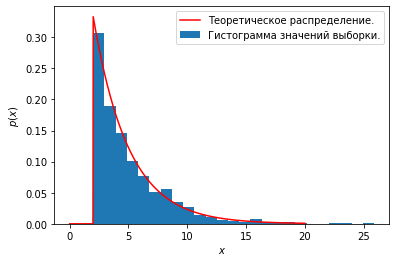

In [4]:
x = np.linspace(0, 20, 1000)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, color='red', label="Теоретическое распределение.")

r = expon_rv.rvs(size=1000)
plt.hist(r, bins=25, density=True, label="Гистограмма значений выборки.")

plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')

### Эксперимент.

Выборка будет состоять из `n` значений, взятых из распределения. Для нее найдем среднее с помощью метода `mean()` . 

Проведем эксперимент для нескольких выборок разного размера и убедимся, что чем больше выборка, тем гистаграмма будет более похожа на нормальное распредление. 

Теоретическое нормальное распределение: $N(a, \sigma^2)$, где a = EX, $\sigma = \sqrt{DX/t}$. 
Первое в силу сдвига $S_n - ES_n$ из условия теоремы, второе --- из-за $DS_n$ в знаментеле.

In [5]:
def test(n):
    plt.figure(figsize=(16, 4))
    EX = expon_rv.mean()
    sigma = expon_rv.std()
    DX = sigma**2
    mu = EX
    sigma = (DX/n)**0.5
    
#Теоретическое нормальное распределение.
    x = np.linspace(0, 10, 100)
    norm_rv = sts.norm(loc=mu, scale=sigma)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, color='red', label="Норм. распределение.")
    
#Гистаграмма выборочных средних.   
    m = []
    for _ in range(5000):
        m.append(np.array(expon_rv.rvs(size=n)).mean()) 

    plt.hist(m, bins=40, density=True, label=f"Гистограмма при n = {n}")
    plt.ylabel('$p(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='upper left')

На графиках ниже видно, что с ростом размера выборки гистаграмма выборочных средних приближается к нормальному распределению. 
Особенно хорошо видно, как уходит перекос с левой стороны гистаграммы, вызванный несимметричностью экспоненциального распредлеения.

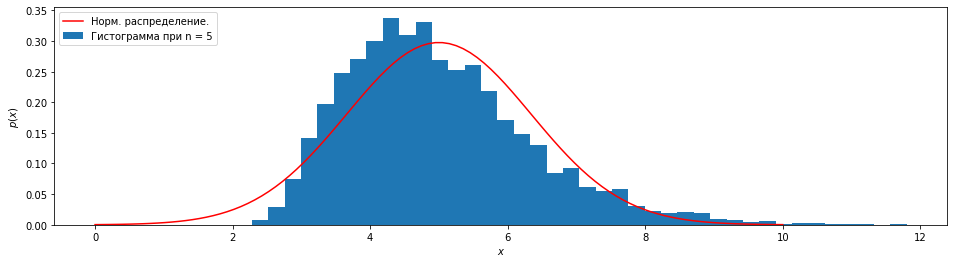

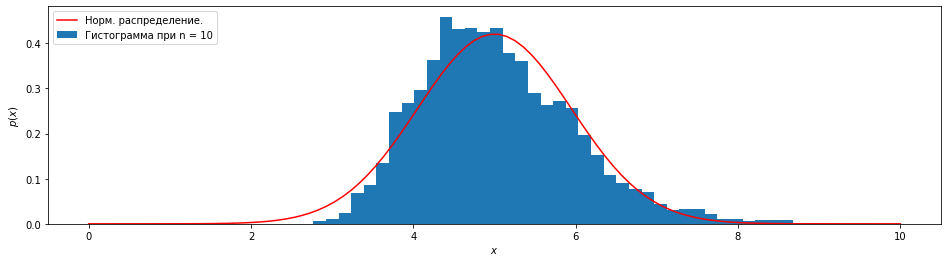

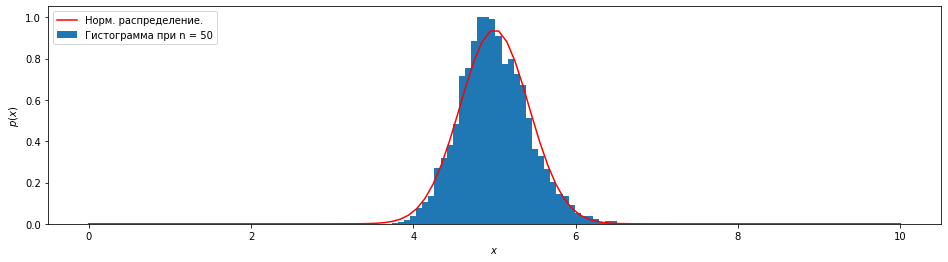

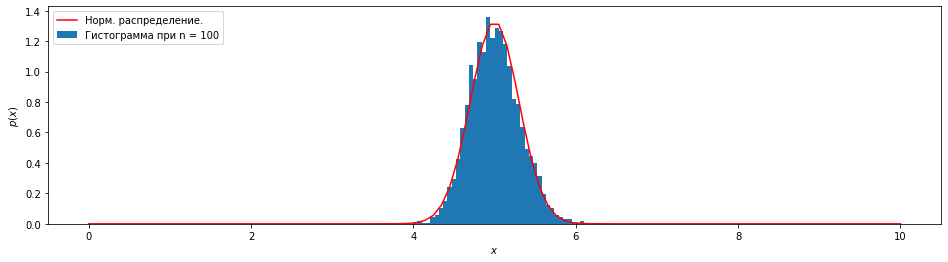

In [6]:
test(5)
test(10)
test(50)
test(100)

## Задание №2.

### Формула свертки

https://ru.wikipedia.org/wiki/Свёртка_(математический_анализ)#Объяснение_на_примере

In [7]:
t_snowing = 12#снег падал
t_melting = 14#снег таял 

In [8]:
snowing = sts.randint(low=0, high=5).rvs(size=t_snowing)#Зависимсоть массы выпавшего за час снега в кг от часа суток

melting = sts.uniform(loc=0, scale=1).rvs(size=t_melting)
part_snow = np.full(t_melting, melting.sum())
part_snow = (part_snow - np.cumsum(melting))/melting.sum()#part_snow[i] = сколько осталось от снега выпавшего i часов назад


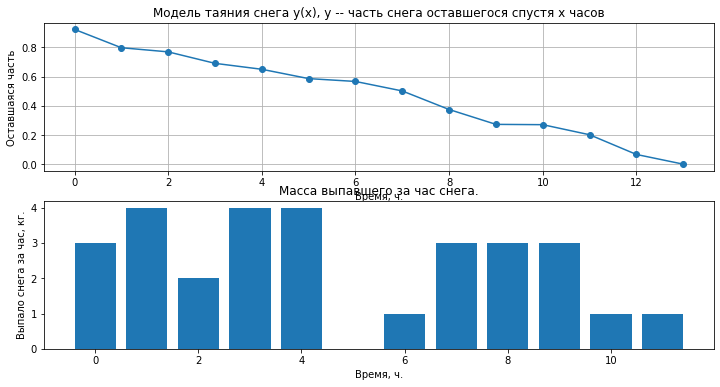

In [9]:
fig, axes = plt.subplots(2, 1)

axes[0].plot(np.arange(t_melting), part_snow, marker = 'o')
axes[1].bar(np.arange(t_snowing), snowing)
axes[0].set_xlabel('Время, ч.')
axes[0].set_ylabel('Оставшаяся часть')
axes[0].set_title('Модель таяния снега y(x), у -- часть снега оставшегося спустя x часов')
axes[1].set_xlabel('Время, ч.')
axes[1].set_ylabel('Выпало снега за час, кг.')
axes[1].set_title('Масса выпавшего за час снега.')
fig.set_figwidth(12)
fig.set_figheight(6)
axes[0].grid()

Воспользуемся методом `convolve()` для вычисления свертки.

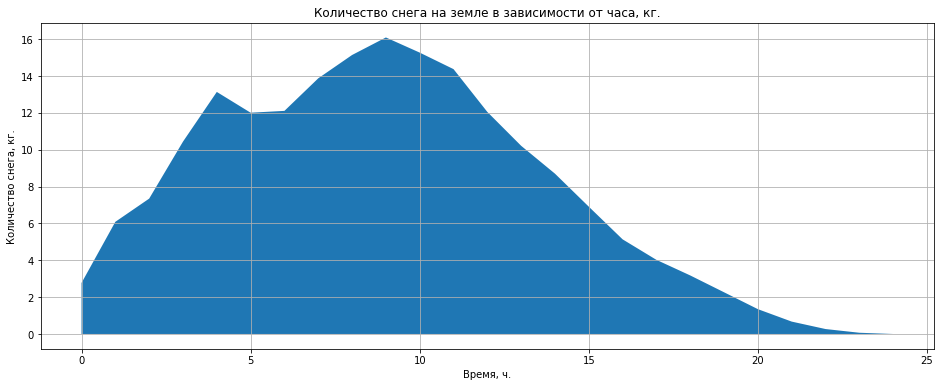

In [10]:
fig, axes = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(6)
axes.grid()
axes.set_xlabel('Время, ч.')
axes.set_ylabel('Количество снега, кг.')
axes.set_title('Количество снега на земле в зависимости от часа, кг.')
rest_of_snow = np.convolve(part_snow, snowing)#Снега в кг лежит сейчас на земле
axes.stackplot(np.arange(t_snowing + t_melting - 1), rest_of_snow)

Для более наглядного графика вместо метода `convolve()` посчитаем свертку для каждого часа по отдельности.

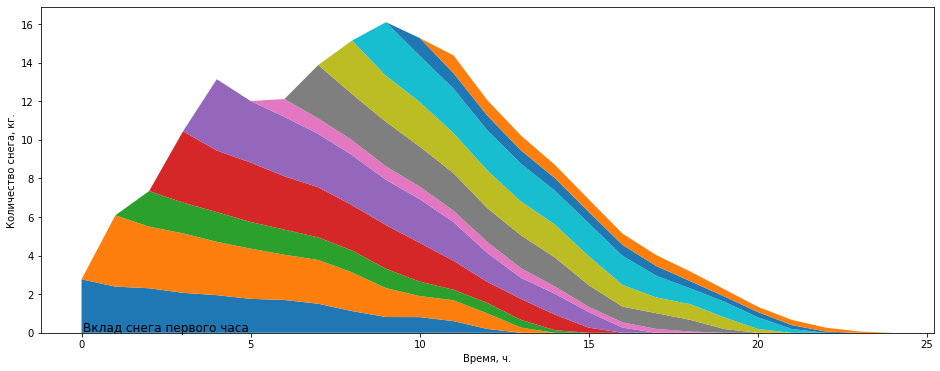

In [11]:
fig, axes = plt.subplots()

x = np.arange(t_snowing + t_melting - 1)
y = []
temp = []

for i in range(t_snowing):
    temp = temp + [0] * i
    temp = temp + list(snowing[i]*part_snow)
    temp = temp + [0] * (t_snowing - 1 - i)
    y.append(temp)
    temp = []

fig.set_figwidth(16)
fig.set_figheight(6)
axes.set_xlabel('Время, ч.')
axes.set_ylabel('Количество снега, кг.')
axes.text(0.05, 0.05, 'Вклад снега первого часа',
        rotation = 0,
        fontsize = 12)
axes.stackplot(x, y)